# Dewpoint Calculations

Tests an approximation and basic dewpoint calculations

Equations are taken from here: https://en.wikipedia.org/wiki/Dew_point#Dew_point_weather_records

Simple approximation

$$
\gamma(T,RH) = \ln\left(\frac{100}{RH}\right) + \frac{bT}{c + T}  
$$

$$
T_{dp} = \frac{c \gamma(T,RH)}{b - \gamma(T,RH)}  
$$

where $T$ is dry bulb temperature and $RH$ is relative humidity.  This approximation is based on the relationship between the
_saturated vapour pressure_ $P_s(T)$ and _actual vapour pressure_  $P_a(T)$ for a given temperature.
$$
P_s(T) = \frac{100}{RH} P_a(T) = a e^{\frac{bT}{c + T}}
$$

$$
\begin{align}
P_a(T) & = \frac{RH}{100} P_s(T) = a e^{\gamma(T,RH)} \\
& \approx P_s{T_w} - P 0.00066 (1 + 0.00115 T_w)(T -T_w) 
\end{align}
$$

$$
T_{dp} = \frac{c \ln\frac{P_a(T)}{a}}{b - \ln\frac{P_a(T)}{a}}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# Define constants.  These are taken from Bolton, David (July 1980). 
#"The Computation of Equivalent Potential Temperature" (PDF). Monthly Weather Review. 108 (7): doi:10.1175/1520-0493
a = 6.1121
b=18.678
c=257.14
d=234.5

# This is failing for some reason
def psychrometric_equation(t, rh):
    """Returns the psychomentric function value for T and RH"""
    tk = t
    return np.log(100./rh) + (b * tk / (c + tk))

def t_dewpoint_approx(t, rh):
    gamma = psychrometric_equation(t, rh)
    return c * gamma / (b - gamma)

In [36]:
t_dewpoint_approx(30., 20.)

71.78645781329465

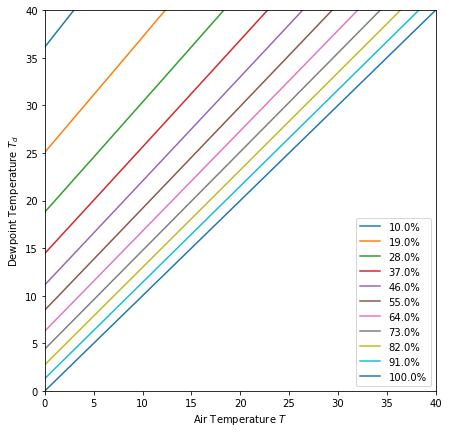

In [19]:
fig, ax = plt.subplots(figsize=(7,7))

t = np.linspace(0,40,41)
for rh in np.linspace(10,100,11):
    td = t_dewpoint_approx(t, rh)
    ax.plot(t, td, label=f"{rh}%")

ax.set_xlim(0,40)
ax.set_xlabel('Air Temperature $T$')
ax.set_ylim(0,40)
ax.set_ylabel('Dewpoint Temperature $T_d$')
ax.legend()

In [23]:
e0 = 0.611 # kPa
t0 = 273  # K - 0 C in K
Rv = 461  # Gas constant J/K/kg
Lv = 2.5e6  # Latent heat of vaporization over a flat water surface [J/kg]
Ld = 2.83e6  # Latent heat of deposition over a flat ice surface [J/kg]

def clasius_clapeyron(t, surface='water'):
    """Calculates saturation vapour pressure given T"""
    tk = t + t0
    if surface == 'ice':
        L = Ld
    else:
        L = Lv
    return e0 * np.exp((L/Rv) * ((1/t0) - (1/tk)))

def vapour_pressure(t, rh, surface='water'):
    es = clasius_clapeyron(t, surface=surface)
    return rh * es / 100.

def dewpoint(e):
    """returns dewpoint given a vapour pressure
    
    :e: vapour pressure in kPa
    
    from equation 5.7, pg 100, Stull, R. 2000, Meteorology for Scientists and Engineers"""
    return 1. / ((1/t0) - ((Rv/Lv) * np.log(e/e0)))

def rh2dewpoint(t, rh):
    """Solves dewpoint temperature from t and rh"""
    e = vapour_pressure(t, rh)
    return dewpoint(e)

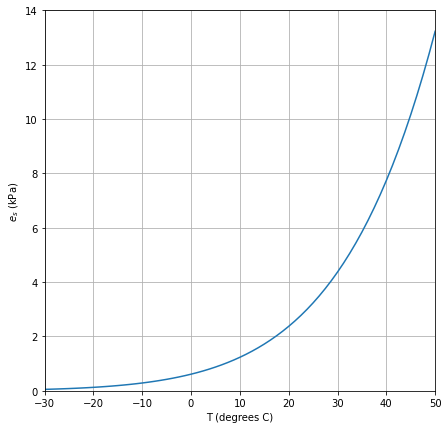

In [16]:
t = np.linspace(-50, 50, 81)
es = clasius_clapeyron(t)

fig, ax = plt.subplots(figsize=(7,7))
ax.set_xlim(-30.,50.)
ax.set_xlabel('T (degrees C)')
ax.set_ylim(0, 14)
ax.set_ylabel('$e_s$ (kPa)')
ax.grid()
ax.plot(t, es)

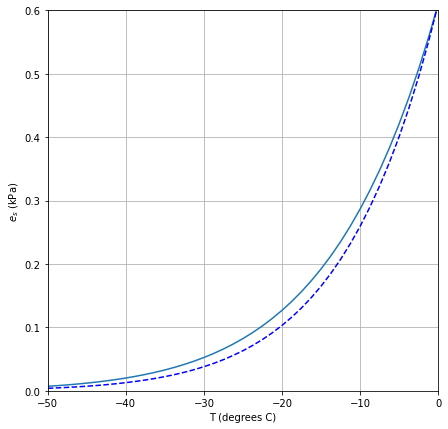

In [17]:
es_ice = clasius_clapeyron(t, surface='ice')

fig, ax = plt.subplots(figsize=(7,7))
ax.set_xlim(-50.,0.)
ax.set_xlabel('T (degrees C)')
ax.set_ylim(0, 0.6)
ax.set_ylabel('$e_s$ (kPa)')
ax.grid()
ax.plot(t, es)
ax.plot(t, es_ice, '--b')

## Test dewpoint

Given desert conditions with a temperature of 30 C and pressure of 100 kPa, find the dewpoint for a relative humidty of 20%

es = 4.367 kPa  
e = 0.2 * es = 0.8734 kPa  
Td = 5 C  

In [21]:
es = vapour_pressure(30., 20.)
es

0.8734368067650373

In [25]:
td = rh2dewpoint(30., 20.)
td = td - t0
td

5.000921081656372

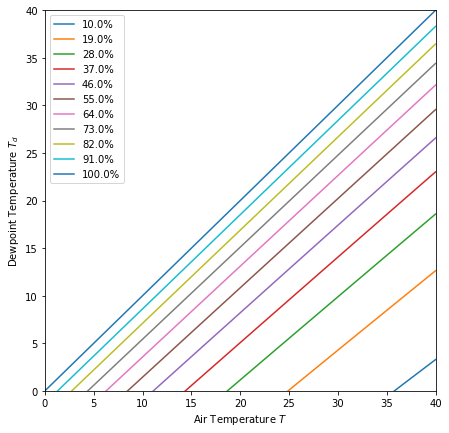

In [27]:
fig, ax = plt.subplots(figsize=(7,7))

t = np.linspace(0,40,41)
for rh in np.linspace(10,100,11):
    td = rh2dewpoint(t, rh) - t0
    ax.plot(t, td, label=f"{rh}%")

ax.set_xlim(0,40)
ax.set_xlabel('Air Temperature $T$')
ax.set_ylim(0,40)
ax.set_ylabel('Dewpoint Temperature $T_d$')
ax.legend()

### Figuring out reasonable dewpoint T based on temperature limits

Assume an acceptable temperature range is -70 C to 50 C.  What are dewpoints for 0% and 100% RH for these temperatures. 

No handles with labels found to put in legend.


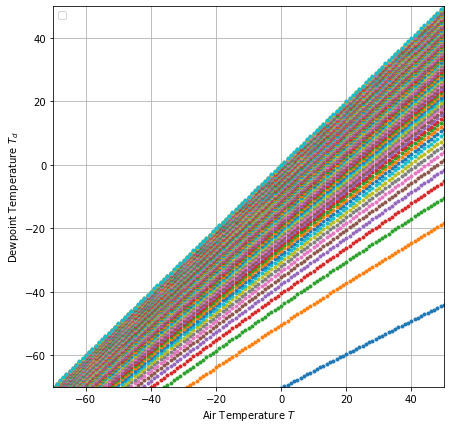

In [45]:
t_lower = -70.
t_upper = 50.

rh_lower = 0.1
rh_upper = 100.

ts = np.linspace(t_lower, t_upper, int(t_upper - t_lower + 1))

fig, ax = plt.subplots(figsize=(7,7))

for rh in np.linspace(rh_lower, rh_upper, int(rh_upper - rh_lower + 1)):
    td = rh2dewpoint(t, rh) - t0
    ax.plot(t, td, '.', ls='')

ax.set_xlim(t_lower, t_upper)
ax.set_xlabel('Air Temperature $T$')
ax.set_ylim(t_lower, t_upper)
ax.set_ylabel('Dewpoint Temperature $T_d$')
ax.grid()
ax.legend()

No handles with labels found to put in legend.


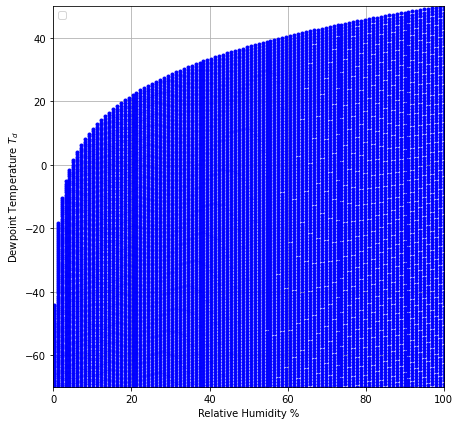

In [49]:
fig, ax = plt.subplots(figsize=(7,7))

for rh in np.linspace(rh_lower, rh_upper, int(rh_upper - rh_lower + 1)):
    td = rh2dewpoint(t, rh) - t0
    ax.plot(np.ones(td.size)*rh, td, '.b', ls='')

ax.set_xlim(0, rh_upper)
ax.set_xlabel('Relative Humidity %')
ax.set_ylim(t_lower, t_upper)
ax.set_ylabel('Dewpoint Temperature $T_d$')
ax.grid()
ax.legend()